In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
X_train,X_test,Y_train, Y_test = load_data()

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

lab_data = rgb2lab(Y_train)

mean_val = np.mean(Y_train)

0
(3908, 64, 64, 1)
(977, 64, 64, 1)
(3908, 64, 64, 3)
(977, 64, 64, 3)


(3908, 64, 64, 3)
(?, 64, 64, 3)
(?, 64, 64, 3)
0.647731


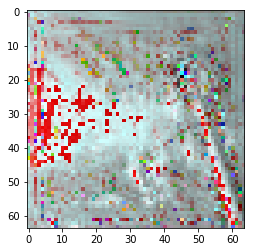

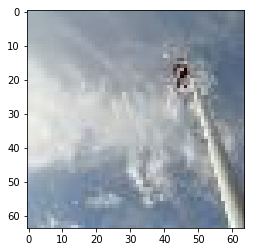

0.548838
0.327206
0.332727
0.228219
0.242538
0.218035
0.224916
0.14962
0.198713
0.146541
0.161069
0.171659
0.150277
0.161533
0.166517
0.145661
0.203285
0.168634
0.169485
0.134496
0.149864
0.154588
0.18834
0.148666
0.150878
0.178899
0.155749
0.10767
0.181052
0.147533
0.154318
0.142908
0.128868
0.144386
0.129575
0.16712
0.127508
0.196256
0.140669
0.137981
0.120242
0.16778
0.132112
0.192529
0.143777
0.173589
0.136083
0.123978
0.179337
0.149355
0.124424
0.165216
0.128619
0.146205
0.143706
0.125841
0.13533
0.162362
0.126973
0.138555
0.147137
0.131596
0.145031
0.131275
0.144902
0.145463
0.123817
0.170982
0.139763
0.149905
0.148803
0.142318
0.127135
0.140999
0.120298
0.141213
0.126312
0.139075
0.124955
0.127677
0.149111
0.139604
0.141152
0.102513
0.118214
0.145244
0.113472
0.163514
0.135911
0.129167
0.117415
0.134143
0.122045
0.123854
0.198948
0.139035
0.119246
0.148116
0.16073
0.116574


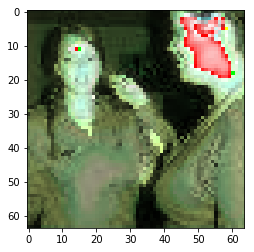

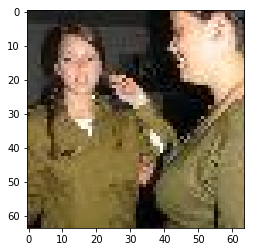

0.130268
0.119441
0.122115
0.120947
0.118694
0.119398
0.154144
0.154451
0.130063
0.145592
0.127891
0.120502
0.12708
0.111247
0.153002
0.114458
0.130591
0.128519
0.120624
0.147091
0.145122
0.143025
0.110411
0.116672
0.127584
0.116318
0.145071
0.126978
0.117049
0.136354
0.158493
0.130713
0.175436
0.136392
0.132528
0.115981
0.150296
0.14845
0.140398
0.112062
0.141529
0.119279
0.155345
0.133884
0.0971927
0.138231
0.110086
0.144269
0.131119
0.139008
0.128485
0.136438
0.136122
0.146896
0.105792
0.123203
0.106303
0.143589
0.134413
0.153747
0.140716
0.118607
0.117449
0.127041
0.135265
0.113583
0.160801
0.122053
0.100377
0.110709
0.149536
0.120139
0.1216
0.166291
0.117463
0.0914356
0.138706
0.12742
0.116788
0.119366
0.139781
0.106538
0.124936
0.154033
0.122719
0.132836
0.140665
0.126196
0.108568
0.130566
0.117743
0.112533
0.116351
0.101727
0.135865
0.13606
0.108103
0.134639
0.134307
0.147477


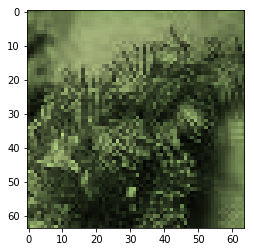

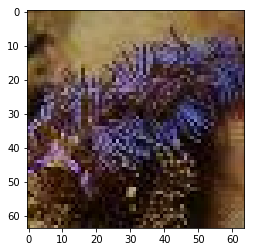

0.126092
0.12227
0.113615
0.116808
0.110419
0.111753
0.117175
0.143199
0.140709
0.113304
0.122192
0.121209
0.151325
0.111121
0.108358
0.132432
0.126636
0.132875
0.143662
0.13378
0.116032
0.108668
0.116794
0.13964
0.105213
0.14452
0.125259
0.109686
0.113625
0.135922
0.119033
0.10141
0.11168
0.114113
0.12815
0.118854
0.120971
0.12504
0.105611
0.1241
0.106777
0.113645
0.110454
0.112178
0.119275
0.117373
0.130454
0.141094
0.111973
0.117168
0.129195
0.129048
0.120931
0.114228
0.123192
0.131629
0.113448
0.130625
0.112084
0.116448
0.138177
0.118957
0.1141
0.139909
0.125861
0.117492
0.135668
0.121464
0.105171
0.131023
0.125291
0.134013
0.0987265
0.1068
0.121039
0.113693
0.116386
0.129144
0.10062
0.10331
0.128055
0.131826
0.127079
0.102204
0.104696
0.109268
0.10551
0.104985
0.104202
0.105414
0.107805
0.115927
0.11626
0.131328
0.119336
0.14035
0.136746
0.103398
0.111219
0.11043


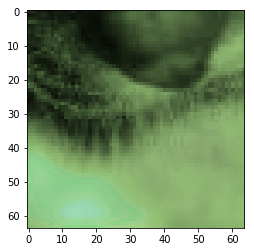

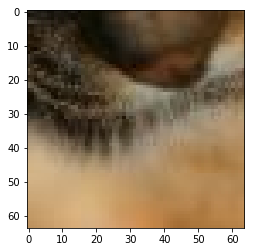

0.128237
0.120528
0.120196
0.10411
0.112285
0.113001
0.154856
0.11707
0.134581
0.115704
0.108279
0.124919
0.126772
0.113184
0.116164
0.130301
0.106979
0.120478
0.0990394
0.105324
0.120418
0.120863
0.16084
0.124215
Next Epoch 0
0.099788


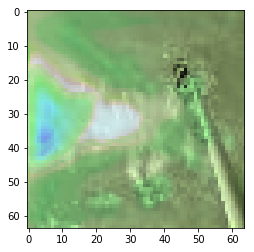

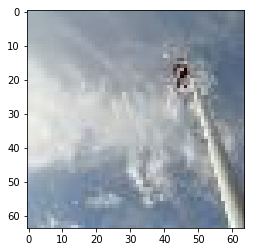

0.116798
0.117746
0.106355
0.122196
0.133191
0.123113
0.128685
0.102929
0.126947
0.111344
0.118244
0.123161
0.111324
0.113775
0.117459
0.11809
0.137124
0.128291
0.127217
0.111081
0.108089
0.114529
0.144217
0.107911
0.115638
0.134102
0.120356
0.109185
0.140878
0.109781
0.12201
0.107671
0.10181
0.12484
0.11257
0.140631
0.134647
0.16194
0.128806
0.135169
0.110085
0.172241
0.12896
0.141595
0.125628
0.137491
0.119067
0.113995
0.144518
0.126331
0.104691
0.150574
0.111602
0.117283
0.122541
0.11394
0.120424
0.142876
0.1167
0.109618
0.126692
0.116778
0.113746
0.113939
0.126579
0.11585
0.108308
0.148244
0.116741
0.116821
0.126255
0.119908
0.113799
0.114963
0.121926
0.120959
0.109851
0.116334
0.108991
0.114025
0.127419
0.125826
0.131848
0.0927836
0.116818
0.131292
0.10631
0.137134
0.120569
0.114212
0.110577
0.116931
0.110421
0.112096
0.135468
0.122751
0.108367
0.132409
0.137196
0.104771


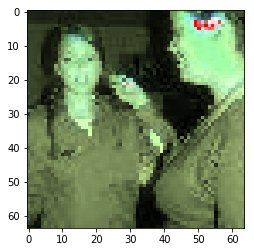

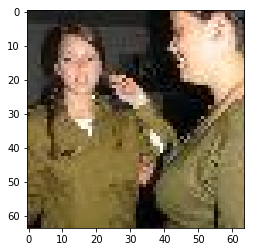

0.120416
0.108297
0.110085
0.108587
0.107083
0.116337
0.150143
0.148304
0.114662
0.115048
0.117467
0.112956
0.117389
0.107857
0.132703
0.110185
0.119678
0.113596
0.111015
0.122356
0.138493
0.130369
0.100599
0.107731
0.112466
0.114871
0.129344
0.116537
0.114304
0.127251
0.125284
0.123798
0.152279
0.121745
0.122151
0.106583
0.138194
0.134719
0.132325
0.104696
0.122517
0.10585
0.142113
0.125256
0.0976261
0.124827
0.109397
0.130899
0.127567
0.128627
0.115737
0.12205
0.143326
0.13508
0.0894602
0.118421
0.105907
0.130333
0.118201
0.120133
0.138108
0.113936
0.11102
0.117714
0.120582
0.104745
0.135819
0.122181
0.0986534
0.105645
0.130833
0.110662
0.121026
0.149483
0.114527
0.0882885
0.124543
0.118729
0.114277
0.121002
0.129169
0.107414
0.122235
0.123656
0.117266
0.124087
0.134291
0.115207
0.111522
0.123403
0.114033
0.106947
0.111142
0.0943897
0.128931
0.114804
0.105176
0.123398
0.128112
0.143027


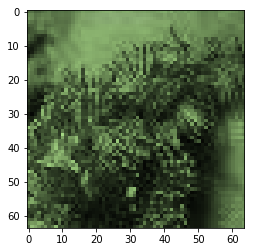

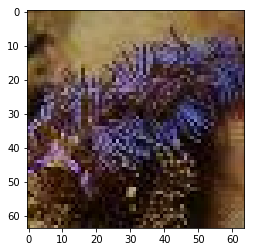

0.123113
0.115594
0.108311
0.117539
0.109436
0.109105
0.117843
0.138104
0.134563
0.115665
0.118749
0.12046
0.133184
0.115235
0.106437
0.127862
0.120757
0.127841
0.140413
0.128682
0.107536
0.109275
0.112134
0.133216
0.105845
0.142736
0.122984
0.105589
0.108683
0.134648
0.114252
0.101636
0.107419
0.112472
0.124987
0.118416
0.119505
0.118865
0.104769
0.118133
0.104427
0.113065
0.114328
0.117429
0.111408
0.116575
0.128217
0.134302
0.112004
0.115813
0.117687
0.124349
0.112017
0.112117
0.119699
0.126987
0.110067
0.122345
0.106788
0.11188
0.134765
0.116295
0.115181
0.135444
0.12272
0.110386
0.128751
0.11741
0.0957603
0.128582
0.124552
0.134469
0.0977291
0.104783
0.116561
0.110251
0.110915
0.12895
0.102107
0.104926
0.122484
0.129625
0.122701
0.102015
0.102998
0.110219
0.105268
0.108949
0.104638
0.102631
0.110329
0.113872
0.113446
0.126689
0.11034
0.139498
0.131494
0.104884
0.113051
0.103656


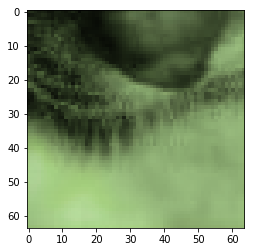

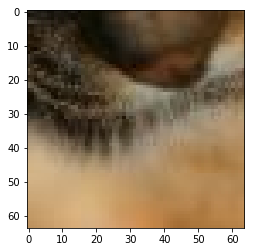

0.120298
0.115059
0.121228
0.102045
0.11149
0.108795
0.152863
0.112102
0.12785
0.110755
0.103691
0.116567
0.125772
0.108219
0.113655
0.120776
0.10432
0.121817
0.0960299
0.0980145
0.109151
0.112222
0.135621
0.1156
Next Epoch 1
0.0949257


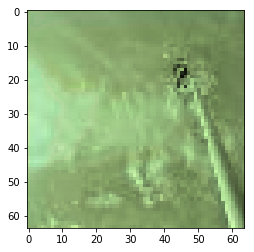

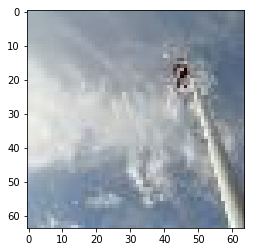

0.111448
0.115197
0.102999
0.122214
0.118009
0.122575
0.115625
0.105762
0.122114
0.112784
0.114336
0.116401
0.116064
0.108956
0.115591
0.114357
0.127801
0.117174
0.122014
0.108181
0.105242
0.112131
0.140284
0.101179
0.109964
0.119448
0.117231
0.106205
0.132991
0.108943
0.122155
0.112187
0.102739
0.115977
0.10773
0.123502
0.109441
0.145457
0.110279
0.125548
0.104868
0.117092
0.107369
0.134836
0.107802
0.121277
0.116377
0.105973
0.134841
0.11946
0.0969269
0.149773
0.110801
0.112452
0.117055
0.103054
0.112119
0.119192
0.107822
0.0984884
0.118939
0.115174
0.107669
0.109711
0.124457
0.106685
0.105536
0.141085
0.113527
0.113029
0.119528
0.115299
0.112087
0.112952
0.108465
0.114067
0.104931
0.112351
0.107181
0.110145
0.126251
0.119012
0.128617
0.0902377
0.113077
0.121584
0.0944493
0.133271
0.119235
0.108375
0.106764
0.114267
0.106517
0.107227
0.11997
0.113694
0.106601
0.12589
0.132265
0.105089


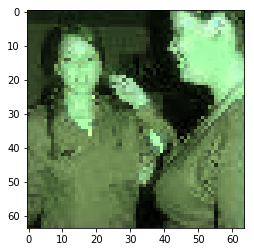

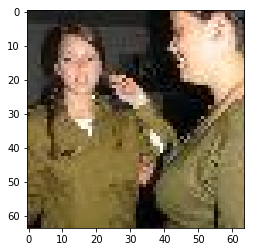

0.117198
0.106504
0.108873
0.106304
0.105592
0.111588
0.137753
0.141044
0.112825
0.109196
0.113245
0.108784
0.112373
0.102998
0.125896
0.102157
0.114677
0.10816
0.10555
0.115987
0.137485
0.125239
0.100547
0.103712
0.110399
0.11347
0.124559
0.114385
0.108442
0.124905
0.121892
0.119161
0.14391
0.120255
0.116683
0.103447
0.137313
0.132693
0.128853
0.103022
0.115544
0.105652
0.135087
0.119481
0.097799
0.119909
0.109134
0.124582
0.128463
0.126838
0.111417
0.118568
0.137331
0.130323
0.0877881
0.115665
0.104836
0.127402
0.114489
0.118878
0.134645
0.112973
0.10863
0.115637
0.119477
0.102626
0.134229
0.117728
0.0949215
0.104025
0.12612
0.109104
0.119446
0.146104
0.113385
0.0887866
0.121671
0.11411
0.11235
0.116406
0.126729
0.107769
0.125333
0.12383
0.113372
0.122049
0.136782
0.112745
0.113241
0.125078
0.110102
0.106606
0.111982
0.0949673
0.133361
0.109866
0.102013
0.117648
0.12606
0.139271


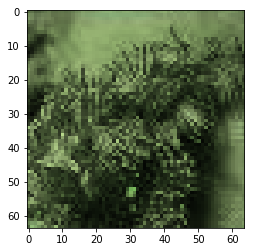

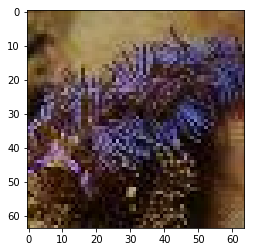

0.121523
0.116623
0.104706
0.112936
0.107355
0.106859
0.118726
0.136738
0.134215
0.112755
0.11779
0.118347
0.127765
0.114451
0.103824
0.123479
0.119223
0.128604
0.140474
0.125538
0.10585
0.108303
0.108468
0.128643
0.103734
0.140228
0.122498
0.105867
0.107711
0.129196
0.112484
0.102451
0.103136
0.11515
0.122221
0.116742
0.117898
0.114505
0.102474
0.11574
0.103746
0.117313
0.114358
0.107556
0.110679
0.117883
0.125378
0.131663
0.109573
0.115612
0.115657
0.123346
0.110585
0.111405
0.118782
0.12451
0.10903
0.120939
0.105328
0.110333
0.131659
0.114189
0.113409
0.132991
0.12319
0.111502
0.127466
0.115436
0.0941748
0.124494
0.122165
0.132991
0.0965055
0.103566
0.115605
0.107919
0.108017
0.12584
0.0993222
0.10539
0.119766
0.128435
0.119472
0.100296
0.10078
0.109122
0.101884
0.107062
0.102641
0.1007
0.106128
0.114182
0.112525
0.125042
0.110575
0.137381
0.13103
0.103618
0.111168
0.103053


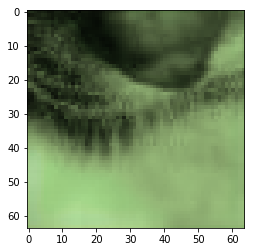

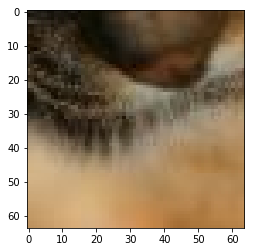

0.122058
0.115039
0.118986
0.100503
0.110129
0.10694
0.149891
0.110357
0.12695
0.109994
0.10417
0.116719
0.125037
0.108389
0.112004
0.117894
0.103486
0.118647
0.0961783
0.0977314
0.108236
0.110956
0.134786
0.113622
Next Epoch 2
0.0942704


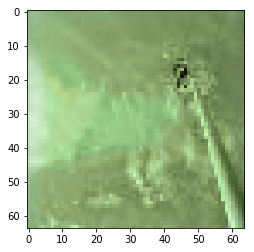

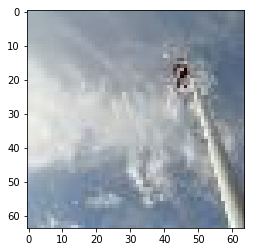

0.110463
0.116436
0.1015
0.120671
0.117408
0.122849
0.113934
0.103919
0.12192
0.111623
0.113212
0.114238
0.115478
0.108112
0.114679
0.113592
0.126183
0.115977
0.120877
0.105927
0.101809
0.110627
0.138457
0.101983
0.107452
0.118106
0.115708
0.104914
0.132573
0.10686
0.121406
0.108487
0.101766
0.116038
0.107559
0.120911
0.10938
0.146696
0.105408
0.123857
0.103483
0.114221
0.107237
0.136025
0.103959
0.122057
0.116388
0.103949
0.134953
0.118162
0.0966973
0.148799
0.109611
0.112413
0.11545
0.101439
0.110528
0.115601
0.106925
0.0974206
0.118133
0.115119
0.107057
0.109336
0.121884
0.105752
0.104355
0.140494
0.112532
0.110443
0.11842
0.112183
0.109883
0.113246
0.108415
0.112466
0.104295
0.111357
0.107888
0.108614
0.125558
0.117714
0.127643
0.0895338
0.113241
0.119838
0.0939725
0.133163
0.117802
0.107171
0.111806
0.116613
0.109645
0.109801
0.123862
0.121338
0.112033
0.131299
0.133965
0.107933


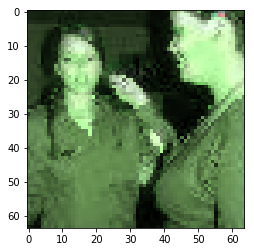

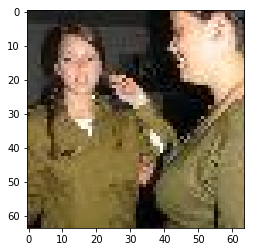

0.118221
0.107925
0.110977
0.108934
0.106573
0.111265
0.13855
0.145016
0.111338
0.112946
0.113202
0.108724
0.112157
0.10341
0.1267
0.100519
0.114546
0.108372
0.108318
0.115866
0.134607
0.125425
0.0982906
0.102866
0.108274
0.111497
0.123197
0.114037
0.106103
0.126095
0.121641
0.118484
0.145682
0.117997
0.117848
0.103003
0.136466
0.132964
0.129172
0.101551
0.115236
0.103115
0.135718
0.119725
0.0965398
0.119659
0.108202
0.125996
0.124792
0.127207
0.109747
0.120175
0.137466
0.129791
0.0889854
0.114329
0.104029
0.127735
0.112744
0.116671
0.133996
0.114983
0.107008
0.114599
0.121362
0.103118
0.133481
0.116193
0.0930136
0.105138
0.126281
0.109172
0.116973
0.143927
0.11258
0.0885954
0.122236
0.114131
0.112761
0.116057
0.128017
0.107749
0.120167
0.124371
0.110776
0.117014
0.130942
0.112725
0.106788
0.122029
0.110224
0.105189
0.108713
0.0920615
0.124585
0.109481
0.101003
0.116308
0.12976
0.137835


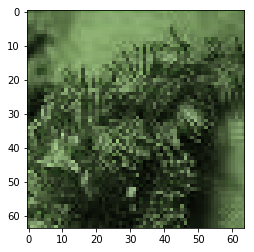

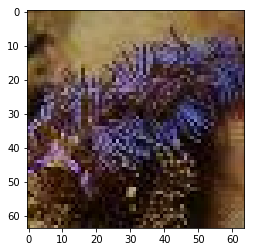

0.119434
0.115415
0.105479
0.111626
0.105844
0.107173
0.117195
0.136765
0.133001
0.113649
0.120431
0.117528
0.125878
0.11197
0.102678
0.1229
0.11853
0.128785
0.139321
0.123928
0.10548
0.107018
0.110082
0.129478
0.10201
0.141404
0.121555
0.10437
0.107093
0.130315
0.111916
0.101438
0.10186
0.110677
0.121801
0.117554
0.116509
0.116495
0.101249
0.114659
0.105071
0.11265
0.111045
0.106734
0.109328
0.11552
0.127069
0.130051
0.106478
0.114518
0.115012
0.119478
0.11045
0.108781
0.117347
0.123329
0.109464
0.118374
0.1046
0.106551
0.131223
0.113007
0.109005
0.132038
0.118777
0.109919
0.124927
0.115783
0.0940406
0.122258
0.120412
0.129504
0.094806
0.10198
0.114354
0.107092
0.109463
0.125317
0.0981645
0.101678
0.117823
0.124133
0.119637
0.0980192
0.0974676
0.10622
0.100362
0.107407
0.103002
0.099122
0.104705
0.112028
0.110372
0.124412
0.107163
0.136117
0.129881
0.101133
0.112358
0.101302


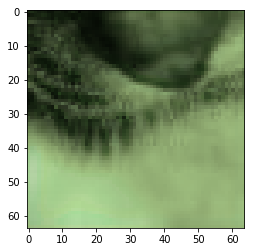

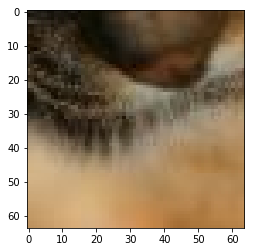

0.118537
0.112368
0.118258
0.0991734
0.108821
0.105632
0.146421
0.10838
0.126505
0.109074
0.10297
0.115325
0.122327
0.107136
0.111867
0.11739
0.101781
0.118232
0.0940688
0.0958262
0.10648
0.109371
0.132673
0.113805
Next Epoch 3
0.0935472


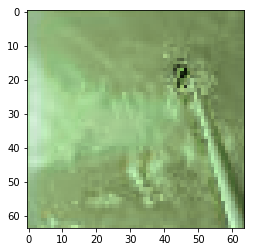

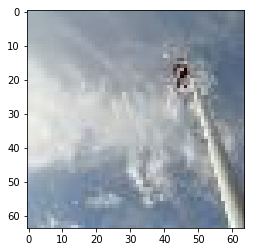

0.109569
0.114741
0.0990506
0.117319
0.115466
0.122223
0.113687
0.102796
0.121285
0.110703
0.112052
0.111804
0.111638
0.106709
0.112984
0.113536
0.127702
0.116192
0.119058
0.106316
0.10094
0.111229
0.136488
0.100709
0.105024
0.11814
0.114951
0.104798
0.131311
0.105723
0.120955
0.108829
0.100807
0.113817
0.106532
0.118037
0.10827
0.146842
0.104096
0.123118
0.103774
0.110919
0.106579
0.133963
0.103107
0.120805
0.116606
0.103487
0.134091
0.116774
0.095424
0.149167
0.109281
0.111301
0.114203
0.101065
0.109814
0.114867
0.105337
0.0964212
0.117625
0.113554
0.107295
0.107769
0.121056
0.105188
0.105077
0.139323
0.111343
0.109003
0.117211
0.111051
0.109613
0.111668
0.106684
0.111245
0.10334
0.110449
0.106474
0.107589
0.125177
0.116687
0.12632
0.0890139
0.112504
0.118281
0.0923821
0.130624
0.116879
0.104647
0.10604
0.111096
0.103535
0.104894
0.119958
0.113936
0.104132
0.123538
0.131132
0.100362


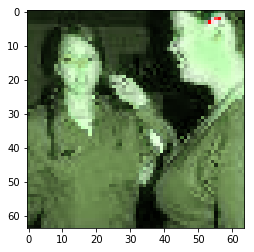

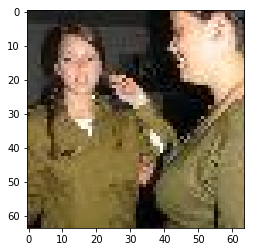

0.114761
0.102374
0.104731
0.104583
0.101909
0.10803
0.136204
0.139309
0.110254
0.10818
0.11124
0.106989
0.108492
0.102456
0.123365
0.100194
0.110505
0.105607
0.104483
0.113149
0.132133
0.122769
0.0963447
0.101645
0.10691
0.110642
0.121436
0.11086
0.105224
0.122292
0.11884
0.119108
0.142953
0.116921
0.114066
0.102131
0.135522
0.130759
0.126741
0.10092
0.111397
0.103288
0.131596
0.11838
0.0955729
0.11596
0.107427
0.121998
0.122989
0.125725
0.108469
0.115409
0.13508
0.127335
0.0872624
0.112103
0.103852
0.125217
0.111209
0.115728
0.130221
0.112209
0.105674
0.112724
0.117914
0.100843
0.132031
0.114596
0.0952781
0.102716
0.124951
0.10852
0.115685
0.142569
0.113478
0.0868072
0.121277
0.112148
0.111083
0.114921
0.125582
0.106789
0.11949
0.121507
0.109312
0.114586
0.130351
0.111395
0.107017
0.12271
0.108445
0.103193
0.107918
0.0929397
0.127296
0.106098
0.0995864
0.114669
0.122559
0.136517


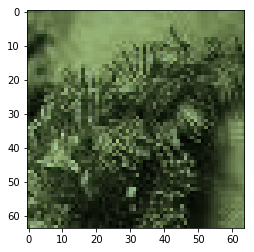

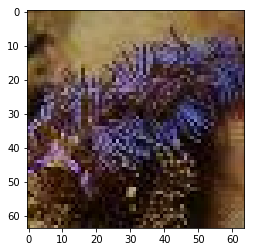

0.118005
0.114275
0.102222
0.109211
0.102727
0.104846
0.116499
0.134467
0.129757
0.110061
0.115119
0.115169
0.124014
0.111711
0.0997531
0.119841
0.116658
0.127544
0.137404
0.122868
0.103183
0.105883
0.104895
0.12802
0.0993205
0.13779
0.119784
0.101893
0.103674
0.127335
0.109206
0.0985293
0.0981013
0.10716
0.118669
0.116191
0.114584
0.113807
0.0986932
0.113076
0.103527
0.110979
0.109044
0.105726
0.10855
0.114844
0.12377
0.127149
0.103982
0.111674
0.113229
0.117219
0.107158
0.108964
0.117417
0.120701
0.107438
0.116434
0.102012
0.105988
0.128844
0.112224
0.107583
0.131155
0.116747
0.107908
0.123335
0.112303
0.0919543
0.120704
0.118915
0.127828
0.092369
0.0996479
0.111035
0.104645
0.106821
0.122784
0.0948079
0.100156
0.117617
0.120653
0.120175
0.0970326
0.0967938
0.10542
0.098579
0.106094
0.105691
0.0976057
0.105849
0.110685
0.110123
0.124982
0.109749
0.135181
0.131257
0.102578
0.11557
0.105482


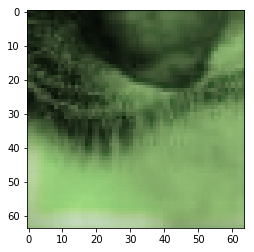

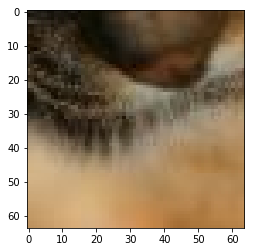

0.122282
0.112671
0.117109
0.0989415
0.108414
0.105427
0.149054
0.108972
0.127168
0.111353
0.104491
0.115401
0.119639
0.106633
0.111174
0.119396
0.101933
0.117164
0.097112
0.0954379
0.105852
0.109152
0.132121
0.112737
Next Epoch 4


In [33]:
tf.reset_default_graph()

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

def show_images(images,gray = False):
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);
    plt.show()

print (Y_train.shape)

with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(hsv_out-hsv_in))
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 12
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        print (losses)
        if(i%100 == 0):
            
            show_images(rgb_o[5])
            show_images(rgb_i[5])

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]),
                     X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 5
for i in range(num_epochs):
    epoch_number = i
    train_epoch(Y_train)
    print ("Next Epoch",i)
    
    #val_result(X_test, Y_test)